In [1]:
from clustersim.core.simulator import Simulator

from clustersim.core.workload import Task, Job, UnifiedRandomWorkload
from clustersim.core.resources import Cpu, Mem, Gpu, Node
import clustersim.core.scheduler

In [2]:
sim = Simulator()


sim.add_node({'gpu': Gpu([1, 1, 1, 1])})
dispatcher = sim.add_dispatcher('random')

for _ in range(4):
    dispatcher.add_workload('closed_random',
                            income_range=(0, 0), tasktime_range=(10, 20),
                            resources={'gpu': Gpu([0.4, 0.8])})
dispatcher.add_scheduler('basic', sim.nodes)

sim.run(until=1000)

Start generating work
Start generating work
Start generating work
Start generating work
0: Try to allocate <GPU res, max: [0.4, 0.8], remain: [0.4, 0.8]> with <GPU res, max: [1, 1, 1, 1], remain: [1, 1, 1, 1]>
1: Allocated <GPU res, max: [0.4, 0.8], remain: [0.4, 0.8]> with <GPU res, max: [1, 1, 1, 1], remain: [1, 1, 1, 1]>
2: Try to allocate <GPU res, max: [0.4, 0.8], remain: [0.4, 0.8]> with <GPU res, max: [1, 1, 1, 1], remain: [0.6, 0.19999999999999996, 1, 1]>
3: Allocated <GPU res, max: [0.4, 0.8], remain: [0.4, 0.8]> with <GPU res, max: [1, 1, 1, 1], remain: [0.6, 0.19999999999999996, 1, 1]>
4: Try to allocate <GPU res, max: [0.4, 0.8], remain: [0.4, 0.8]> with <GPU res, max: [1, 1, 1, 1], remain: [0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 1]>
4: Try to allocate <GPU res, max: [0.4, 0.8], remain: [0.4, 0.8]> with <GPU res, max: [1, 1, 1, 1], remain: [0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 1]>
5: Try to allocate <GPU res, max: [0.4, 0.8]

In [3]:
node_stats = sim.nodes[0].records
index = [t[0] for t in node_stats['gpu-util']]
value = [t[1] for t in node_stats['gpu-util']]


s_rec = sim.dispatcher.schedulers[0].records
task_runtime = [v[1] for v in s_rec['task_runtime']]
task_waittime = [v[1] for v in s_rec['task_waittime']]
task_total = [v[1] for v in s_rec['task_total']]


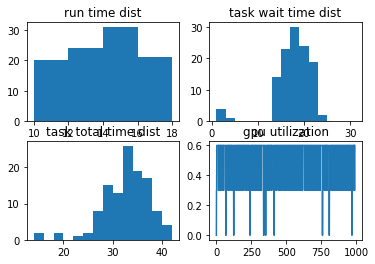

In [4]:
from matplotlib import pyplot as plt

fig, sub = plt.subplots(2, 2)

sub[0][0].hist(task_runtime, bins=range(
    int(min(task_runtime)), int(max(task_runtime)), 2))
sub[0][0].set_title('run time dist')

sub[0][1].hist(task_waittime, range(
    int(min(task_waittime)), int(max(task_waittime)), 2))
sub[0][1].set_title('task wait time dist')

sub[1][0].hist(task_total, range(
    int(min(task_total)), int(max(task_total)), 2))
sub[1][0].set_title('task total time dist')

sub[1][1].plot(index, value)
sub[1][1].set_title('gpu utilization')

plt.show()